# **Projeto de Probabilidade e inferência**: Análise de dados de performance dos times no cenário competitivo de Valorant

Autores:

$\to$ Caio Vinicius de Azevedo   - 20220040815;

$\to$ Davi Matias Soares Genuino - 20220042186;

$\to$ Hannah Beatryz Lima Santos - 20220034925;

# **1 - Descrição do Projeto:**

O presente projeto consiste na análise do desempenho de alguns times profissionais no jogo Valorant, desenvolvido pela Riot Games.
Valorant é um jogo de tiro, com visão em primeira pessoa, que envolve personagens com habilidades especiais. Para via de explicação dos dados aqui descritos, apresentaremos uma breve descrição das mecânicas de vitória e derrota do jogo.

De modo geral, os jogos competitivios envolvem diversos mapas. A partida em um desses mapas é dividida em rounds, onde os dois times são postos nas posições de ataque e defesa. A cada 12 rounds, essas posições são invertidas para que o time atacante passe a ser o defensor e vice-versa. Vence a partida (e o mapa) o time que atingir 13 rounds vitoriosos primeiro.

No primeiro round da partida e no primeiro round após a inversão, nenhum dos times tem acesso a armas potentes ou recursos em abundância. Hipoteticamente, o resultado desse round, no entanto, poderá garantir essas ferramentas para o time que vencer. Por essa razão, os chamados *Rounds de pistola* ou simplesmente *pistol*'s possuem destaque dentre os outros. Sempre haverão dois rounds pistol por partida, independentemente de qual equipe começou defendendo ou atacando.

Os arquivos com os dados estão disponíveis [no site kaggle](https://www.kaggle.com/datasets/anud3ep/valorant), e as informações neles dispostas foram extraídas do site [The Spike](https://www.thespike.gg) em 14 de abril de 2022, relativas aos três meses anteriores à referida data.


## Hipóteses

Antes da análise, formulamos as seguintes hipóteses sobre os dados:

1. Times que jogaram em mais mapas acabarão por ter uma taxa de vitória maior em todos os aspectos.
  - A hipótese se fundamenta no fato de que, em cenários competitivos, times que não jogarem em muitos mapas provavelmente foram eliminados mais cedo que os outros.

2. Times que tem alta taxa de vitória enquanto estão na função de atacantes possuirão taxa de vitória significativamente menor quando estiverem defendendo e vice-versa.
  - Hipótese baseada na ideia de que times podem possuir estratégias com qualidades discrepantes para cada situação. Isso pode estar relacionado com características individuais dos seus componentes, ou do modo segundo o qual realizam seus treinos
3. Taxas de vitórias altas em rounds de pistola aumentam a chance de vencer o mapa.
  - Hipótese baseada nas características dos rounds de pistola em relação aos demais.

Com essas hipóteses em mente, partiremos para a análise dos dados.

# **2 - Pré-processamento e Análise preliminar:**



Utilizaremos a linguagem `Python`, aliada às bibliotecas `pandas`, `matplotlib`, `seaborn`, `statsmodels` e `numpy` como forma principal de manipulação dos dados. O comando abaixo serve para realizar a configuração inicial do projeto, em conjunto com a importação das bibliotecas e da nossa base de dados.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
sns.set_style("dark")


df=pd.read_csv('sample_data/teams.csv', encoding= 'unicode_escape')

O bloco de códigos abaixo realiza a conversão das entrada da base para valores do tipo `float`. Em seguida, são exibidas 10 entradas da base de dados, representando o desempenho de 10 times até a data de coleta dos dados. Para cada tipo de round são calculadas também as taxas de vitória (ou *winrate*s, como também as chamaremos), tomadas com base no cálculo: $$winrate = \frac{vitorias}{round}$$

In [2]:
# Converting number of matches played/won from int --> float
df['maps_won']=pd.to_numeric(df['maps_won'],downcast='float')
df['atk_won']=pd.to_numeric(df['atk_won'],downcast='float')
df['def_won']=pd.to_numeric(df['def_won'],downcast='float')
df['pistol_won']=pd.to_numeric(df['pistol_won'],downcast='float')

df['maps_played']=pd.to_numeric(df['maps_played'],downcast='float')
df['atk_played']=pd.to_numeric(df['atk_played'],downcast='float')
df['def_played']=pd.to_numeric(df['def_played'],downcast='float')
df['pistol_played']=pd.to_numeric(df['pistol_played'],downcast='float')

# Converting winrate from string (percentage) --> float
df['maps_won%']=pd.to_numeric(df['maps_won']/df['maps_played'],downcast='float')
df['atk_won%']=pd.to_numeric(df['atk_won']/df['atk_played'],downcast='float')
df['def_won%']=pd.to_numeric(df['def_won']/df['def_played'],downcast='float')
df['pistol_won%']=pd.to_numeric(df['pistol_won']/df['pistol_played'],downcast='float')
df.head(22).T

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
team,Ninjas in Pyjamas,T1,ZETA DIVISION,Renegades,Gen.G Esports,VALORANDO,TSM FTX,Cloud9,Built By Gamers,Dignitas,...,303 Esports,Crazy Raccoon,Wave Esports,HEET,FaZe Clan,9z Team,Team BDS,G2 Esports,Complexity,FULL SENSE
country,br,us,jp,ca,ca,de,us,us,us,us,...,us,jp,eu,gb,us,ar,fr,eu,us,th
maps_played,39.0,69.0,29.0,71.0,47.0,27.0,70.0,39.0,59.0,39.0,...,37.0,28.0,44.0,30.0,53.0,27.0,28.0,49.0,95.0,60.0
maps_won,22.0,47.0,23.0,44.0,30.0,17.0,51.0,27.0,39.0,22.0,...,11.0,18.0,30.0,21.0,39.0,16.0,17.0,36.0,63.0,47.0
maps_won%,0.564103,0.681159,0.793103,0.619718,0.638298,0.62963,0.728571,0.692308,0.661017,0.564103,...,0.297297,0.642857,0.681818,0.7,0.735849,0.592593,0.607143,0.734694,0.663158,0.783333
atk_played,396.0,687.0,270.0,762.0,487.0,230.0,689.0,425.0,606.0,421.0,...,389.0,249.0,428.0,284.0,516.0,253.0,289.0,505.0,936.0,603.0
atk_won,219.0,366.0,170.0,412.0,266.0,117.0,402.0,221.0,328.0,222.0,...,160.0,150.0,222.0,156.0,316.0,137.0,167.0,266.0,529.0,357.0
atk_won%,0.55303,0.532751,0.62963,0.540682,0.546201,0.508696,0.583454,0.52,0.541254,0.527316,...,0.411311,0.60241,0.518692,0.549296,0.612403,0.541502,0.577855,0.526733,0.565171,0.59204
def_played,424.0,727.0,300.0,697.0,487.0,281.0,709.0,375.0,623.0,356.0,...,367.0,301.0,482.0,314.0,498.0,297.0,302.0,492.0,1049.0,620.0
def_won,217.0,419.0,168.0,390.0,280.0,164.0,434.0,246.0,361.0,181.0,...,179.0,172.0,304.0,184.0,309.0,157.0,156.0,308.0,572.0,375.0


A seguir, podemos verificar mais algumas informações sobre nossos dados. Ao total, temos à nossa disposição um total de 309 entradas, cada uma com o desempenho de um time profissional de Valorant no ano de 2022 até a data de coleta.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   team           309 non-null    object 
 1   country        309 non-null    object 
 2   maps_played    309 non-null    float32
 3   maps_won       309 non-null    float32
 4   maps_won%      309 non-null    float32
 5   atk_played     309 non-null    float32
 6   atk_won        309 non-null    float32
 7   atk_won%       309 non-null    float32
 8   def_played     309 non-null    float32
 9   def_won        309 non-null    float32
 10  def_won%       309 non-null    float32
 11  pistol_played  309 non-null    float32
 12  pistol_won     309 non-null    float32
 13  pistol_won%    309 non-null    float32
dtypes: float32(12), object(2)
memory usage: 19.4+ KB


Agora, possuimos todos os dados em sua configuração correta para a realização da análise. Começaremos pela verificação simples de algumas variáveis, como as Médias e Medianas, Desvios-Padrões e Variâncias das taxas de vitória (winrate) em cada tipo de round.

In [4]:
# Getting the Means:
print("A winrate média em rounds de pistola é 	:	{:.3f}%".format(100*np.mean(df['pistol_won%'])))
print("A winrate média em rounds de ataque é 	:	{:.3f}%".format(100*np.mean(df['atk_won%'])))
print("A winrate média em rounds de defesa é 	:	{:.3f}%".format(100*np.mean(df['def_won%'])))
print("A winrate média em mapas é 		:	{:.3f}%".format(100*np.mean(df['maps_won%'])))

A winrate média em rounds de pistola é 	:	53.123%
A winrate média em rounds de ataque é 	:	52.663%
A winrate média em rounds de defesa é 	:	53.847%
A winrate média em mapas é 		:	58.477%


In [5]:

# Getting the Medians:
print("A winrate mediana em rounds de pistola é   :  {:.3f}%".format(100*np.median(df['pistol_won%'])))
print("A winrate mediana em rounds de ataque é    :  {:.3f}%".format(100*np.median(df['atk_won%'])))
print("A winrate mediana em rounds de defesa é    :  {:.3f}%".format(100*np.median(df['def_won%'])))
print("A winrate mediana é                        :  {:.3f}%".format(100*np.median(df['maps_won%'])))

A winrate mediana em rounds de pistola é   :  53.571%
A winrate mediana em rounds de ataque é    :  52.242%
A winrate mediana em rounds de defesa é    :  54.046%
A winrate mediana é                        :  59.259%


In [6]:
# Getting the Standard Deviations:
print("O desvio padrão da winrate em rounds de pistola é   :  {:.3f}%".format(100*np.std(df['pistol_won%'])))
print("O desvio padrão da winrate em rounds de ataque é    :  {:.3f}%".format(100*np.std(df['atk_won%'])))
print("O desvio padrão da winrate em rounds de defesa é    :  {:.3f}%".format(100*np.std(df['def_won%'])))
print("O desvio padrão da winrate é                        :  {:.3f}%".format(100*np.std(df['maps_won%'])))

O desvio padrão da winrate em rounds de pistola é   :  6.705%
O desvio padrão da winrate em rounds de ataque é    :  5.267%
O desvio padrão da winrate em rounds de defesa é    :  5.082%
O desvio padrão da winrate é                        :  11.904%


In [7]:
# Getting the Variances:
print("A variância da winrate em rounds de pistola é   :  {:.3f}%".format(100*np.var(df['pistol_won%'])))
print("A variância da winrate em rounds de ataque é    :  {:.3f}%".format(100*np.var(df['atk_won%'])))
print("A variância da winrate em rounds de defesa é    :  {:.3f}%".format(100*np.var(df['def_won%'])))
print("A variância da winrate é                        :  {:.3f}%".format(100*np.var(df['maps_won%'])))

A variância da winrate em rounds de pistola é   :  0.450%
A variância da winrate em rounds de ataque é    :  0.277%
A variância da winrate em rounds de defesa é    :  0.258%
A variância da winrate é                        :  1.417%


A princípio, é visível que as taxas indicam uma taxa de vitória ligeiramente maior em rounds de defesa do que de ataque. Notamos também que em todas as ocasiões, a média das winrates dos times profissionais está consideravelmente acima de 50%. Podemos ver como se dá a distribuição desses dados por meio de gráficos-violino.

> Rounds de pistola:

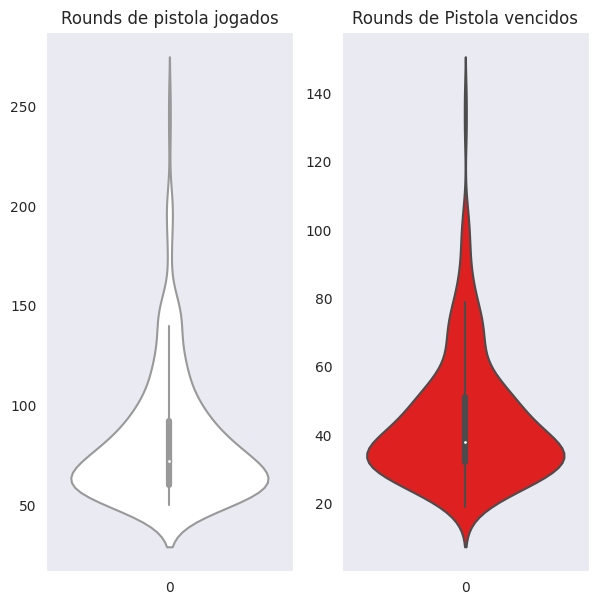

In [8]:
plt.figure(figsize=(7,7))
plt.tight_layout()

p = plt.subplot(1, 2, 1)
p.set_xlim(left=0, right=5)
plt.title('Rounds de pistola jogados')
sns.violinplot(data=df['pistol_played'],color='white')

plt.subplot(1, 2, 2)
plt.title('Rounds de Pistola vencidos')
sns.violinplot(data=df['pistol_won'],color='red')

plt.show()

Aqui podemos ver uma apresentação, na esquerda, da quantidade mais repetida de rounds de pistola jogados pelos times apresentados, enquanto que no gráfico da direita vemos a quantidade mais repetida de vitórias por time em rounds de pistola.

Como podemos observar, a maior parte dos times jogou em torno de 60 rounds de pistola, nos quais ganhou por volta de 35. Alguns poucos times jogaram menos de 50 ou mais de 150 rounds de pistola.

> Rounds de Ataque:

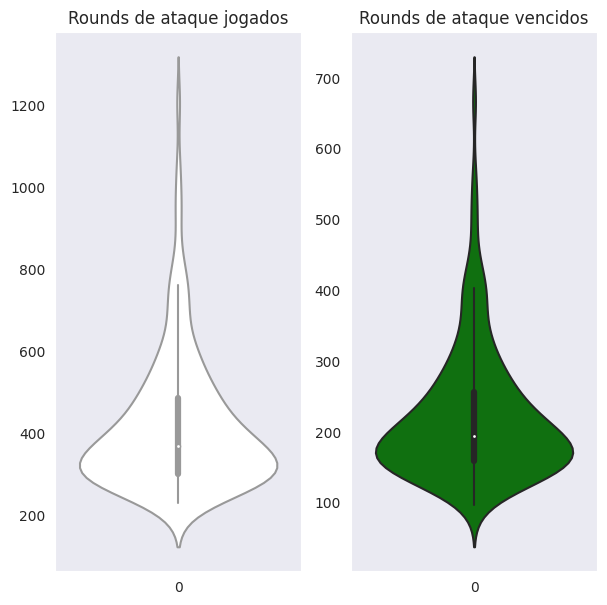

In [9]:
plt.figure(figsize=(7,7))
plt.tight_layout()

plt.subplot(1, 2, 1)
plt.title('Rounds de ataque jogados')
sns.violinplot(data=df['atk_played'],color='white')

plt.subplot(1, 2, 2)
plt.title('Rounds de ataque vencidos')
sns.violinplot(data=df['atk_won'],color='green')

plt.show()

Aqui podemos ver uma apresentação, na esquerda, da quantidade mais repetida de rounds de ataque jogados pelos times apresentados, enquanto que no gráfico da direita vemos a quantidade mais repetida de vitórias por time em rounds de ataque.

É fácil reparar que o número de rounds de ataque é bem maior do que o número de rounds de pistola jogados, uma vez que estes últimos só ocorrem duas vezes por partida. Vemos que a maioria dos times jogou em torno de 380 rounds de pistola, tendo vencido cerca de 190 deles.

> Rounds de Defesa:

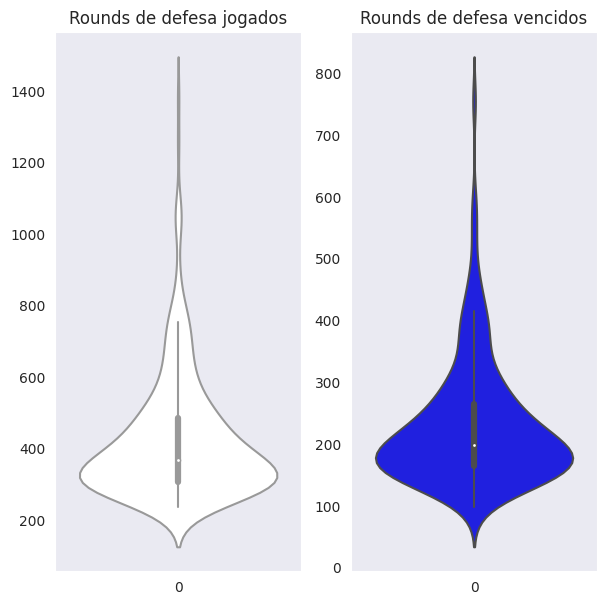

In [10]:
plt.figure(figsize=(7,7))
plt.tight_layout()

plt.subplot(1, 2, 1)
plt.title('Rounds de defesa jogados')
sns.violinplot(data=df['def_played'],color='white')

plt.subplot(1, 2, 2)
plt.title('Rounds de defesa vencidos')
sns.violinplot(data=df['def_won'],color='blue')

plt.show()

Aqui podemos ver uma apresentação, na esquerda, da quantidade mais repetida de rounds de defesa jogados pelos times apresentados, enquanto que no gráfico da direita vemos a quantidade mais repetida de vitórias por time em rounds de defesa.

Para esses gráficos, podemos destacar a semelhança nas escalas que eles apresentam quando comparados aos gráficos de rounds de Ataque. De fato, os números entre esses dois rounds estão relacionados, uma vez que enquanto um dos times está atacando, um outro obrigatoriamente está defendendo e vice-versa.


> Mapas:

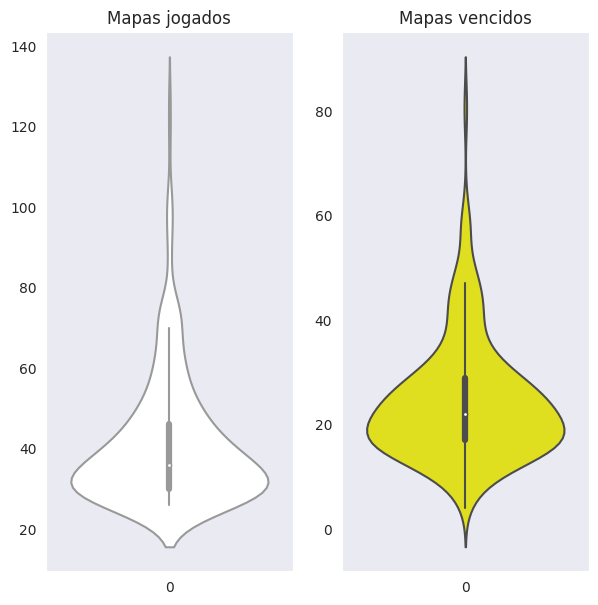

In [11]:
plt.figure(figsize=(7,7))
plt.tight_layout()

plt.subplot(1, 2, 1)
plt.title('Mapas jogados')
sns.violinplot(data=df['maps_played'],color='white')

plt.subplot(1, 2, 2)
plt.title('Mapas vencidos')
sns.violinplot(data=df['maps_won'],color='yellow')

plt.show()

Aqui podemos ver uma apresentação, na esquerda, da quantidade mais repetida de mapas jogados pelos times apresentados, enquanto que no gráfico da direita vemos a quantidade mais repetida de vitórias por time em mapas.

Vemos que os números para os mapas jogados são exatamente o dobro dos números para rounds de pistola jogados. Como atestado, ocorrem exatamente dois rounds de pistola por partida.

A seguir, veremos como se dá a dispersão do número de vitórias e da taxa de vitórias em relação ao número de rounds jogados, por tipo de round:

> Rounds de pistola:

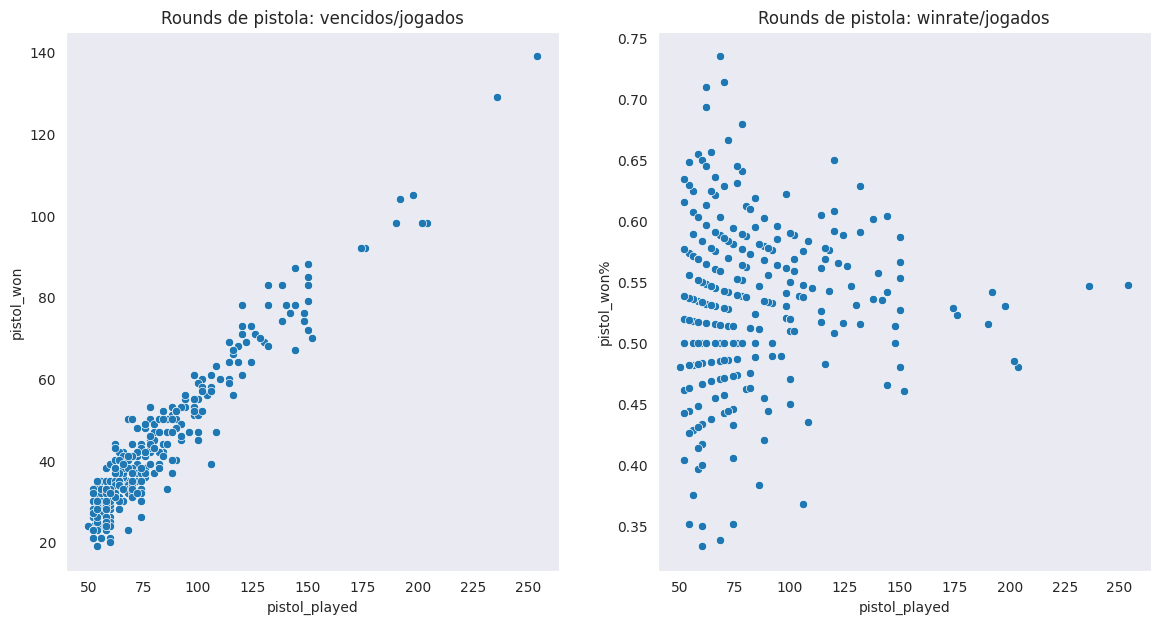

In [12]:
plt.figure(figsize=(14,7))
plt.subplot(1, 2, 1)
plt.title('Rounds de pistola: vencidos/jogados')
sns.scatterplot(data=df, x='pistol_played', y='pistol_won',)
plt.subplot(1, 2, 2)
plt.title('Rounds de pistola: winrate/jogados')
sns.scatterplot(data=df, x='pistol_played', y='pistol_won%')
plt.show()

O gráfico da esquerda representa uma relação, através de uma probabilidade condicional, entre a quantidade de rounds vencidos que só foram utilizados pistolas e a quantidade de rounds de pistola que foram jogados. Enquanto que, no segundo, a relação é entre a winrate nos rounds de pistola e a quantidade de rounds jogados com pistolas.

> Rounds de ataque:

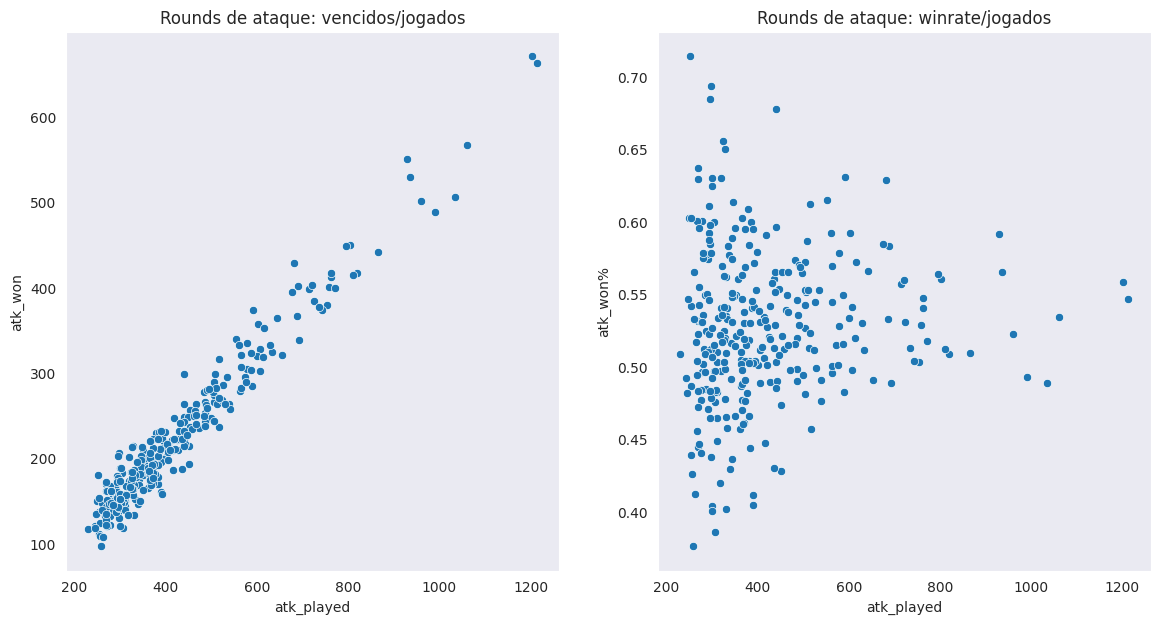

In [13]:
plt.figure(figsize=(14,7))
plt.subplot(1, 2, 1)
plt.title('Rounds de ataque: vencidos/jogados')
sns.scatterplot(data=df, x='atk_played', y='atk_won',)
plt.subplot(1, 2, 2)
plt.title('Rounds de ataque: winrate/jogados')
sns.scatterplot(data=df, x='atk_played', y='atk_won%')
plt.show()

O gráfico da esquerda representa, através de uma probabilidade condicional, a relação entre os rounds onde os times venceram atacando e o total de rounds jogados onde os times estavam no ataque. Enquanto que a relação do segundo gráfico é entre a winrate em partidas onde os times ganharam atacando e o total de partidas onde eles atacaram.

> Rounds de defesa:

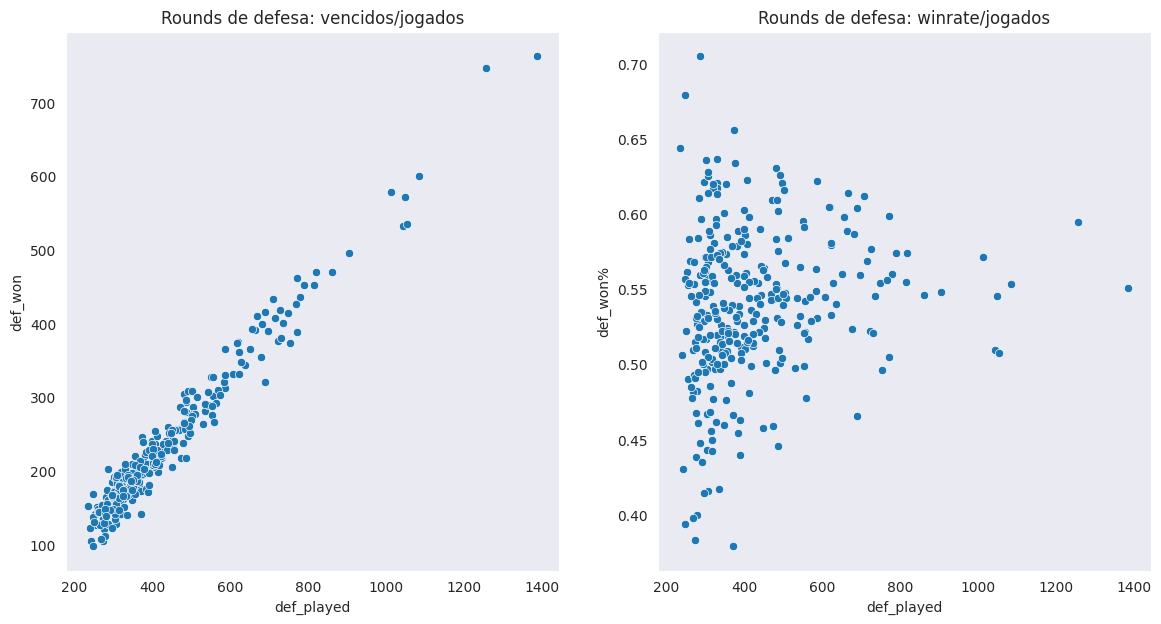

In [14]:
plt.figure(figsize=(14,7))
plt.subplot(1, 2, 1)
plt.title('Rounds de defesa: vencidos/jogados')
sns.scatterplot(data=df, x='def_played', y='def_won',)
plt.subplot(1, 2, 2)
plt.title('Rounds de defesa: winrate/jogados')
sns.scatterplot(data=df, x='def_played', y='def_won%')
plt.show()

O gráfico da esquerda representa, através da probabilidade condicional, a relação entre os rounds de defesa que foram vencidos e o total de rounds jogados que os times estavam na defesa. Enquanto que, no gráfico da direita, a relação é feita entre a winrate em rounds de defesa e o total dos rounds que os times ficaram na defesa.

> Mapas:

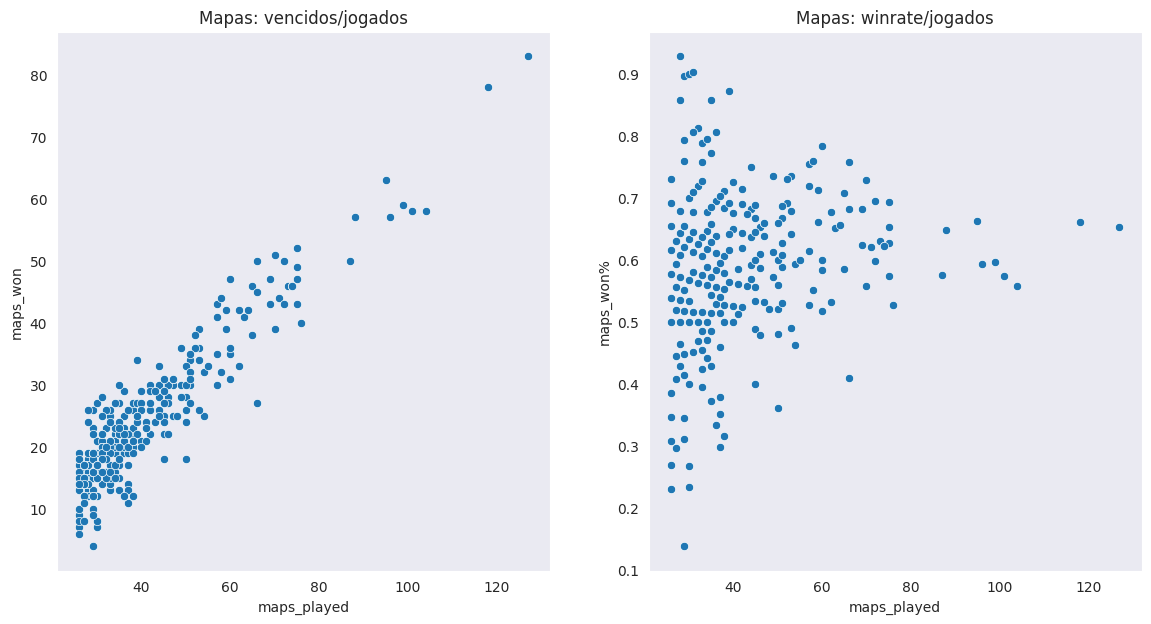

In [15]:
plt.figure(figsize=(14,7))
plt.subplot(1, 2, 1)
plt.title('Mapas: vencidos/jogados')
sns.scatterplot(data=df, x='maps_played', y='maps_won',)
plt.subplot(1, 2, 2)
plt.title('Mapas: winrate/jogados')
sns.scatterplot(data=df, x='maps_played', y='maps_won%')
plt.show()

O gráfico na esquerda representa a relação, realizada por uma probabilidade condicional, entre a quantidade de mapas jogados e vencidos pela quantidade de mapas jogados. Enquanto que, no segundo gráfico, é mostrada a relação entre a winrate nos mapas jogados e a quantidade de mapas jogados.

Como é possível perceber, os gráficos da esquerda sempre apresentam um comportamente aproximadamente linear, logo sua variância é constante e ele é denominado homocedástico. Já os gráficos da direita são todos não lineares, logo sua variância não é constante e eles são classificados como heterocedásticos.

Em seguida, observaremos como esses atributos se distribuem em relação às regiões dos quais cada time participa:



> Rounds de pistola:

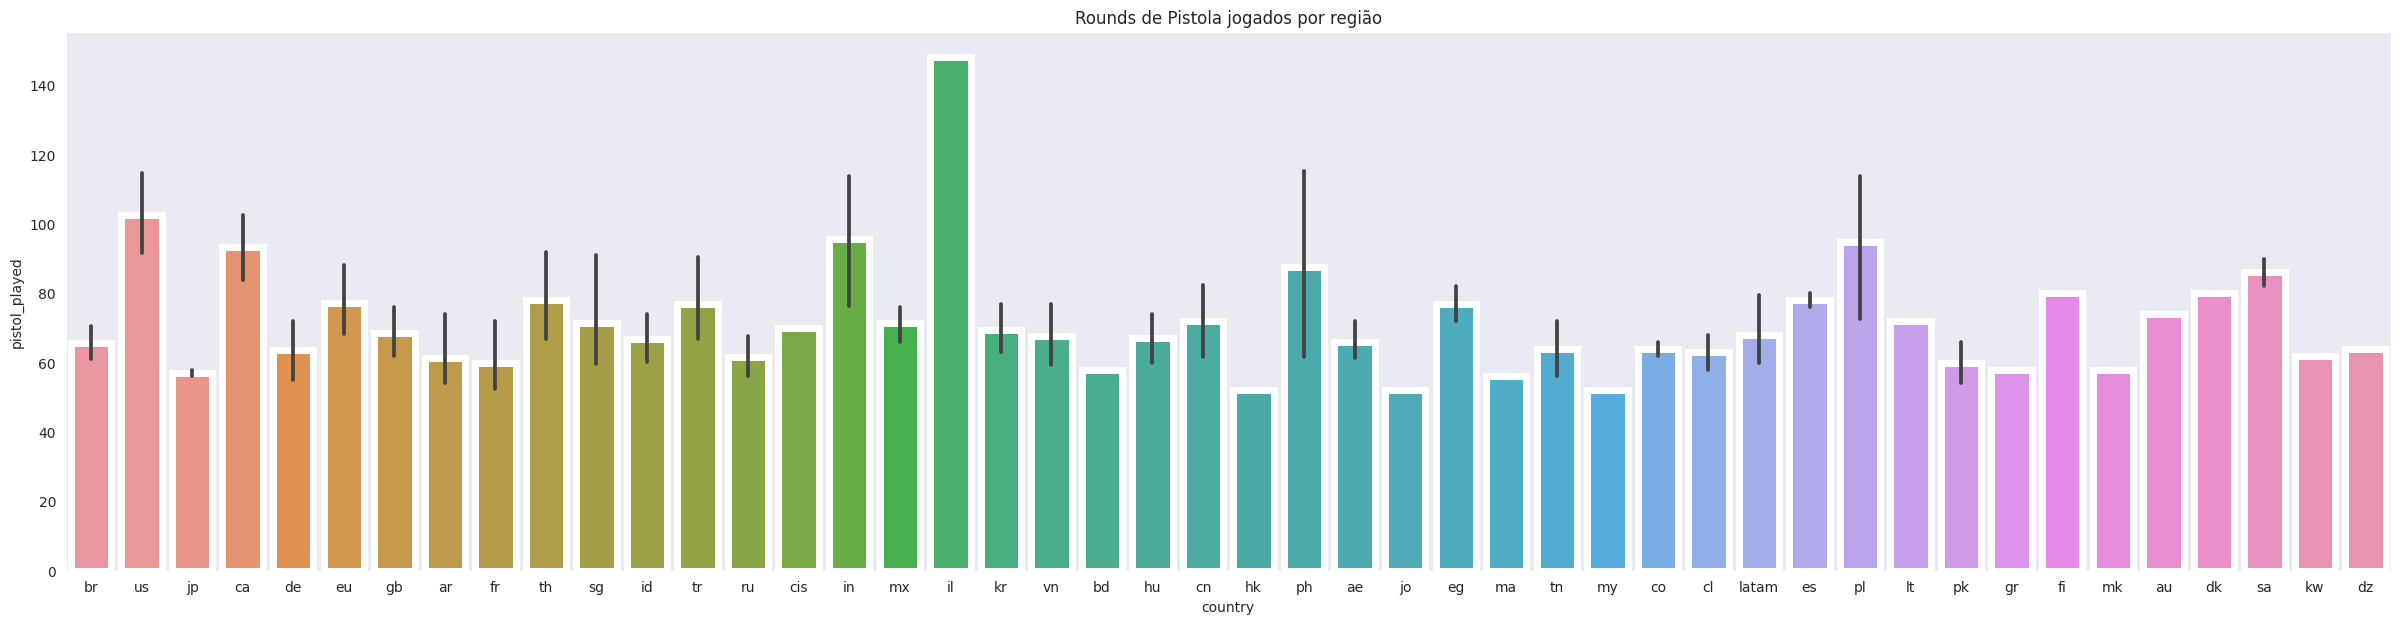

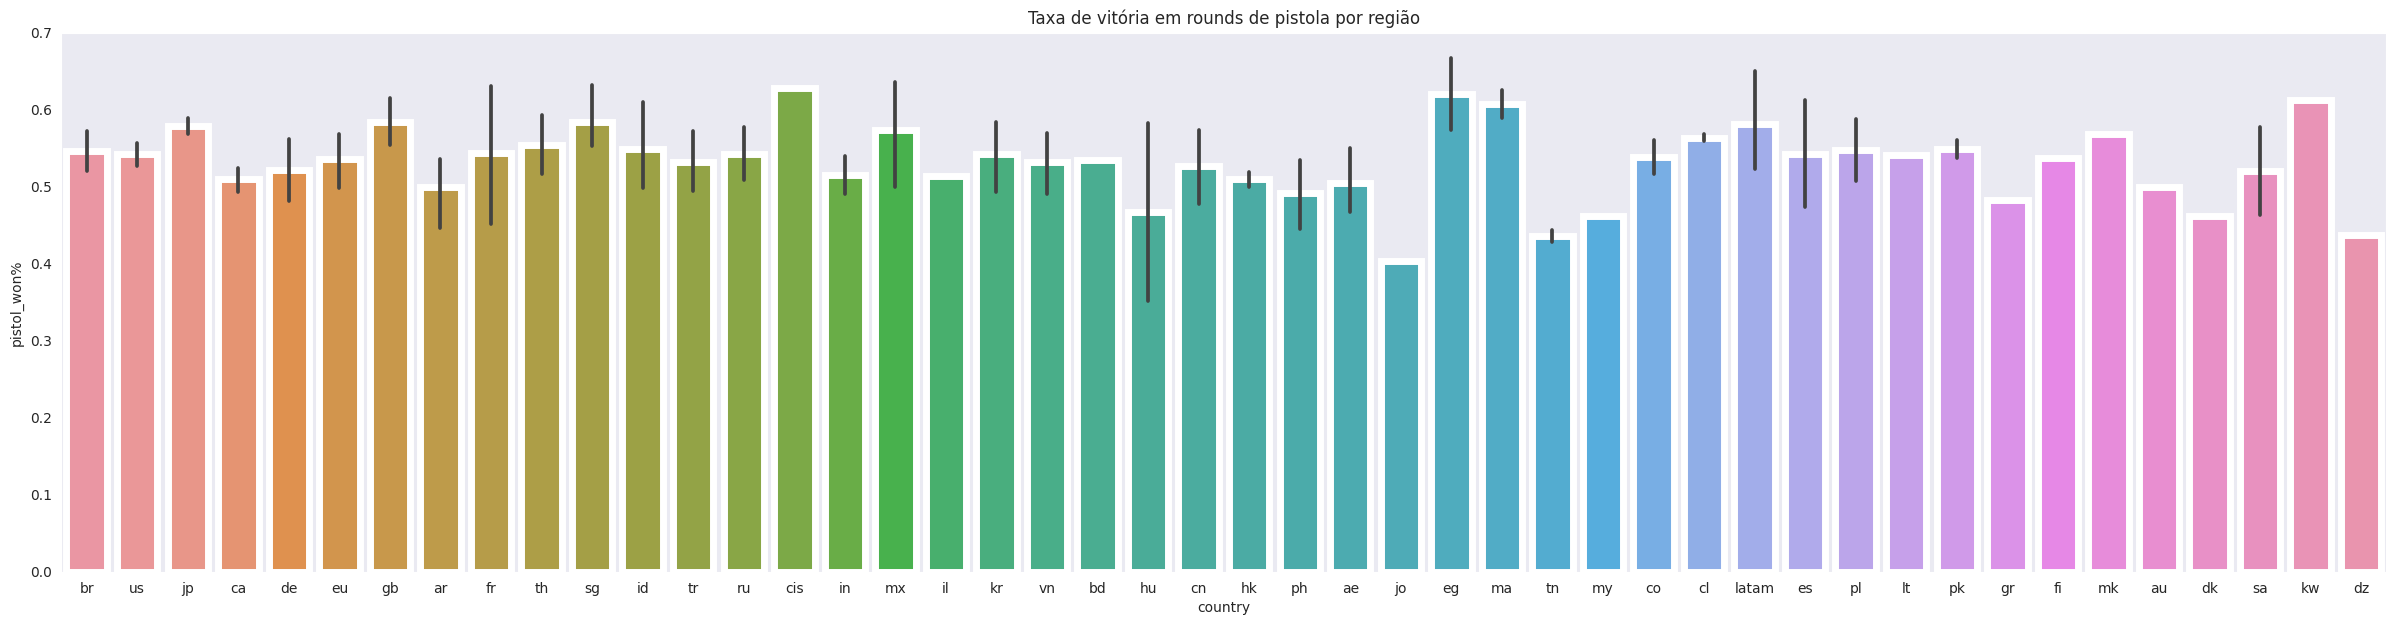

In [16]:
plt.figure(figsize=(30,7))
plt.subplot()
plt.title('Rounds de Pistola jogados por região')
sns.barplot(x='country',y='pistol_played',data=df,linewidth=5)
plt.show()
plt.figure(figsize=(30,7))
plt.subplot()
plt.title('Taxa de vitória em rounds de pistola por região')
sns.barplot(x='country',y='pistol_won%',data=df,linewidth=5)
plt.show()

O gráfico de cima mostra a quantidade de partidas de pistola jogadas por região, com um pico ao redor de 140, enquanto que o gráfico abaixo mostra a taxa de vitória de rounds de pistola de cada região, com 4 regiões tendo a taxa maior que 0.6, mesmo que no gráfico anterior os mesmos não passam de 80 rounds de pistola jogadas.

> Rounds de ataque:

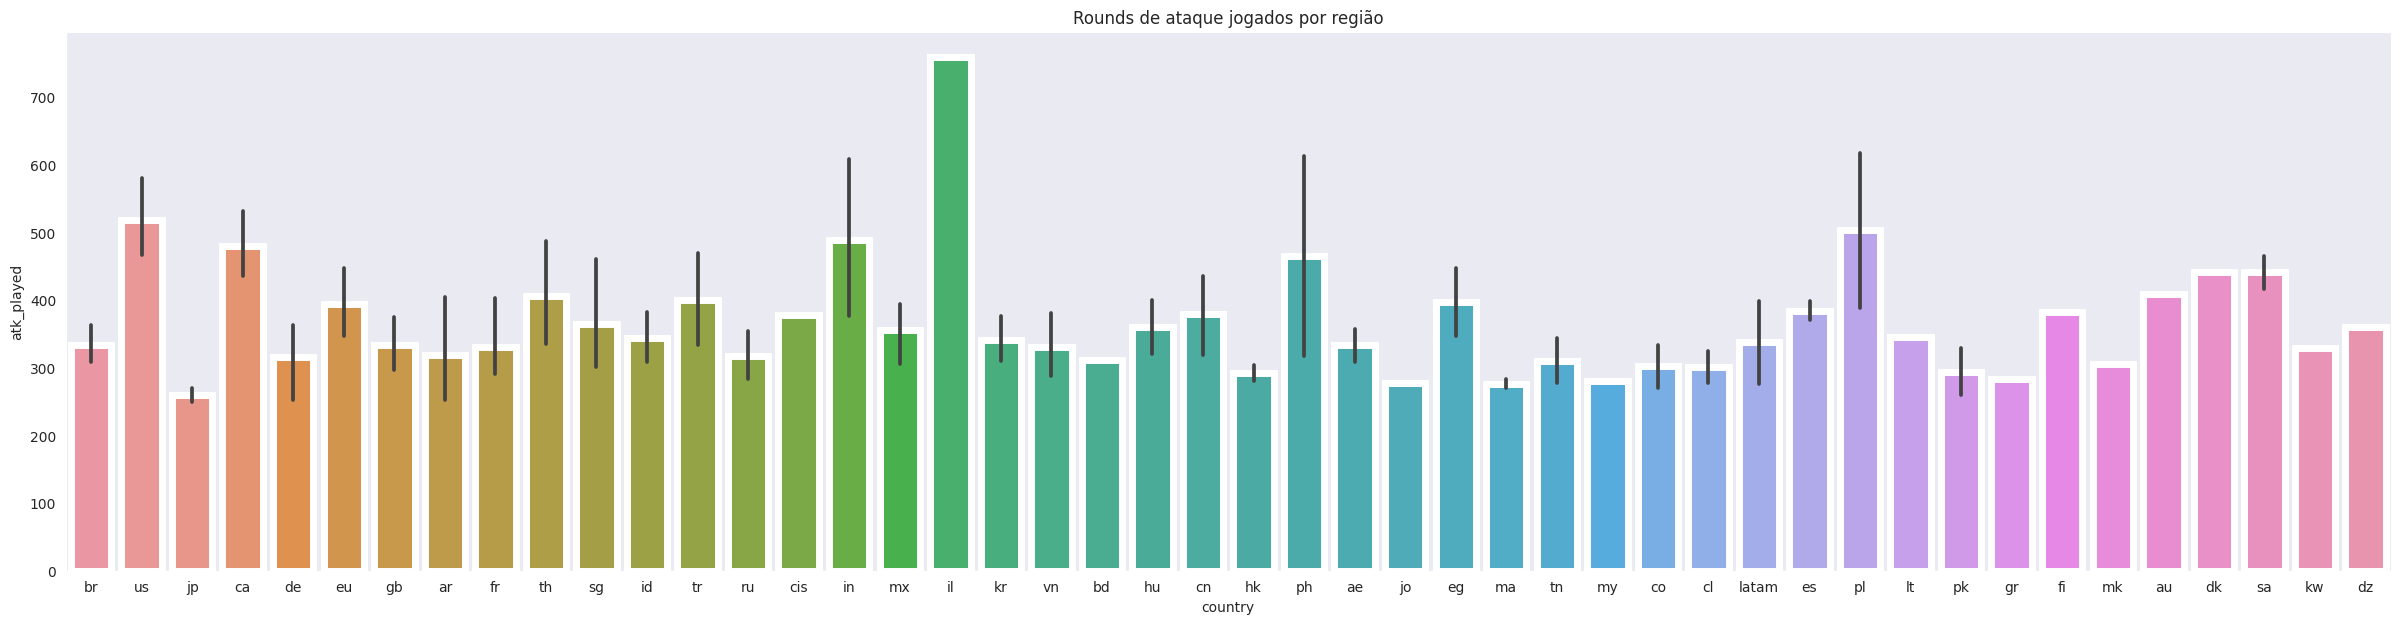

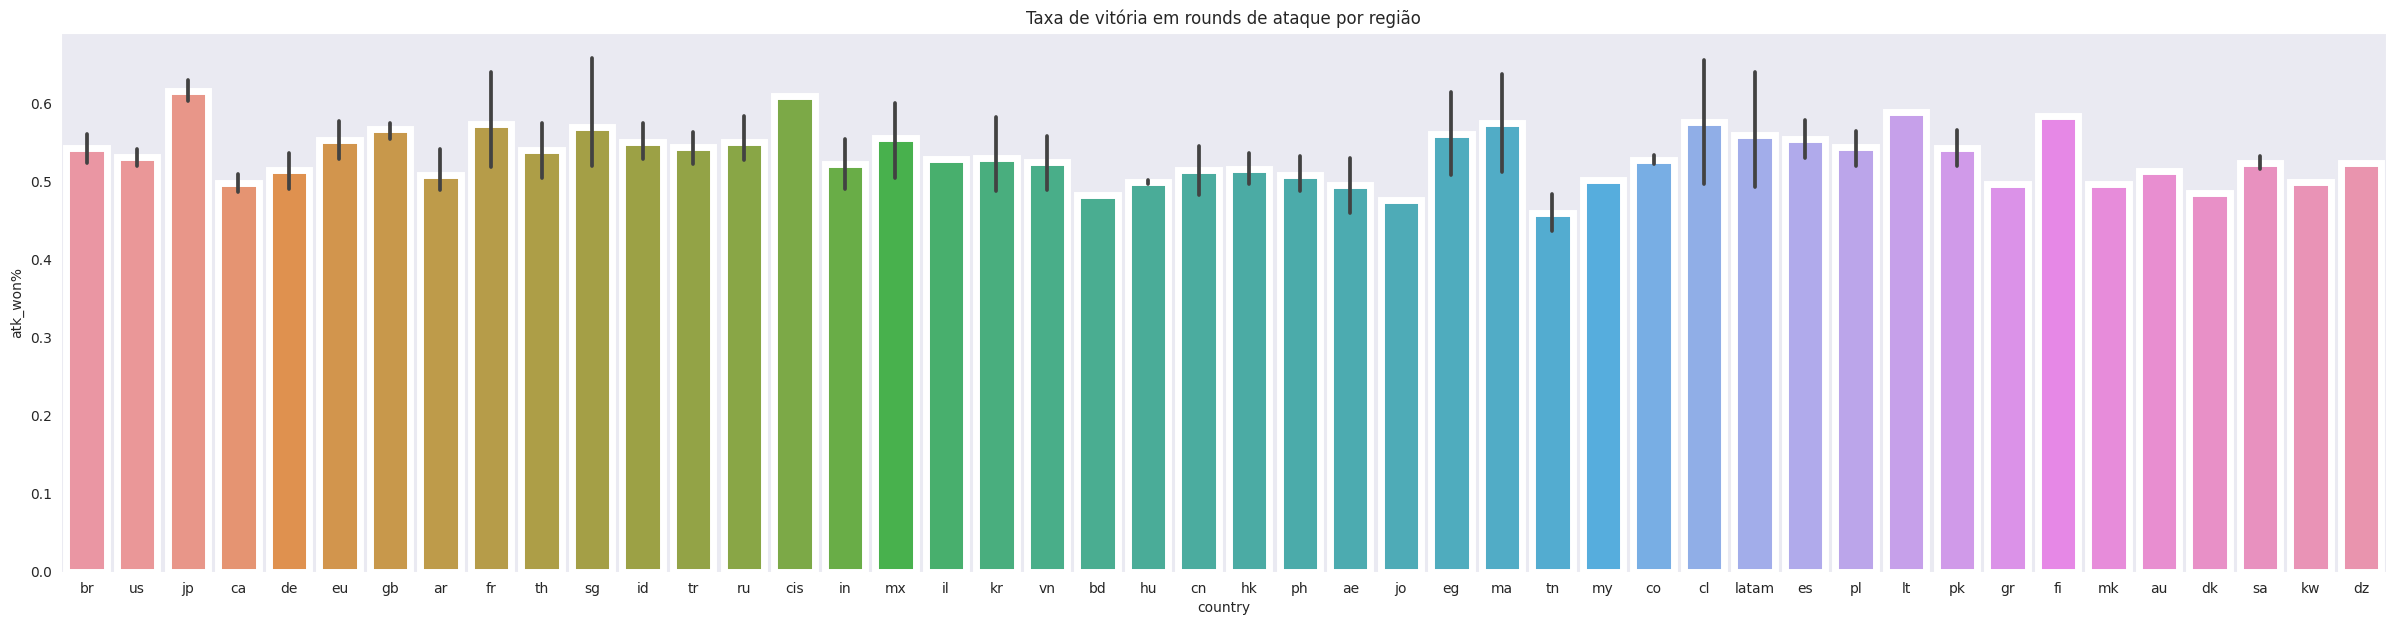

In [17]:
plt.figure(figsize=(30,7))
plt.subplot()
plt.title('Rounds de ataque jogados por região')
sns.barplot(x='country',y='atk_played',data=df,linewidth=5)
plt.show()
plt.figure(figsize=(30,7))
plt.subplot()
plt.title('Taxa de vitória em rounds de ataque por região')
sns.barplot(x='country',y='atk_won%',data=df,linewidth=5)
plt.show()

No gráfico de cima temos a quantidade de rounds de ataque jogados por região, algo que está sendo comparado ao gráfico de baixo que apresenta a taxa de vitória dos rounds de ataque de cada região.

> Rounds de defesa:

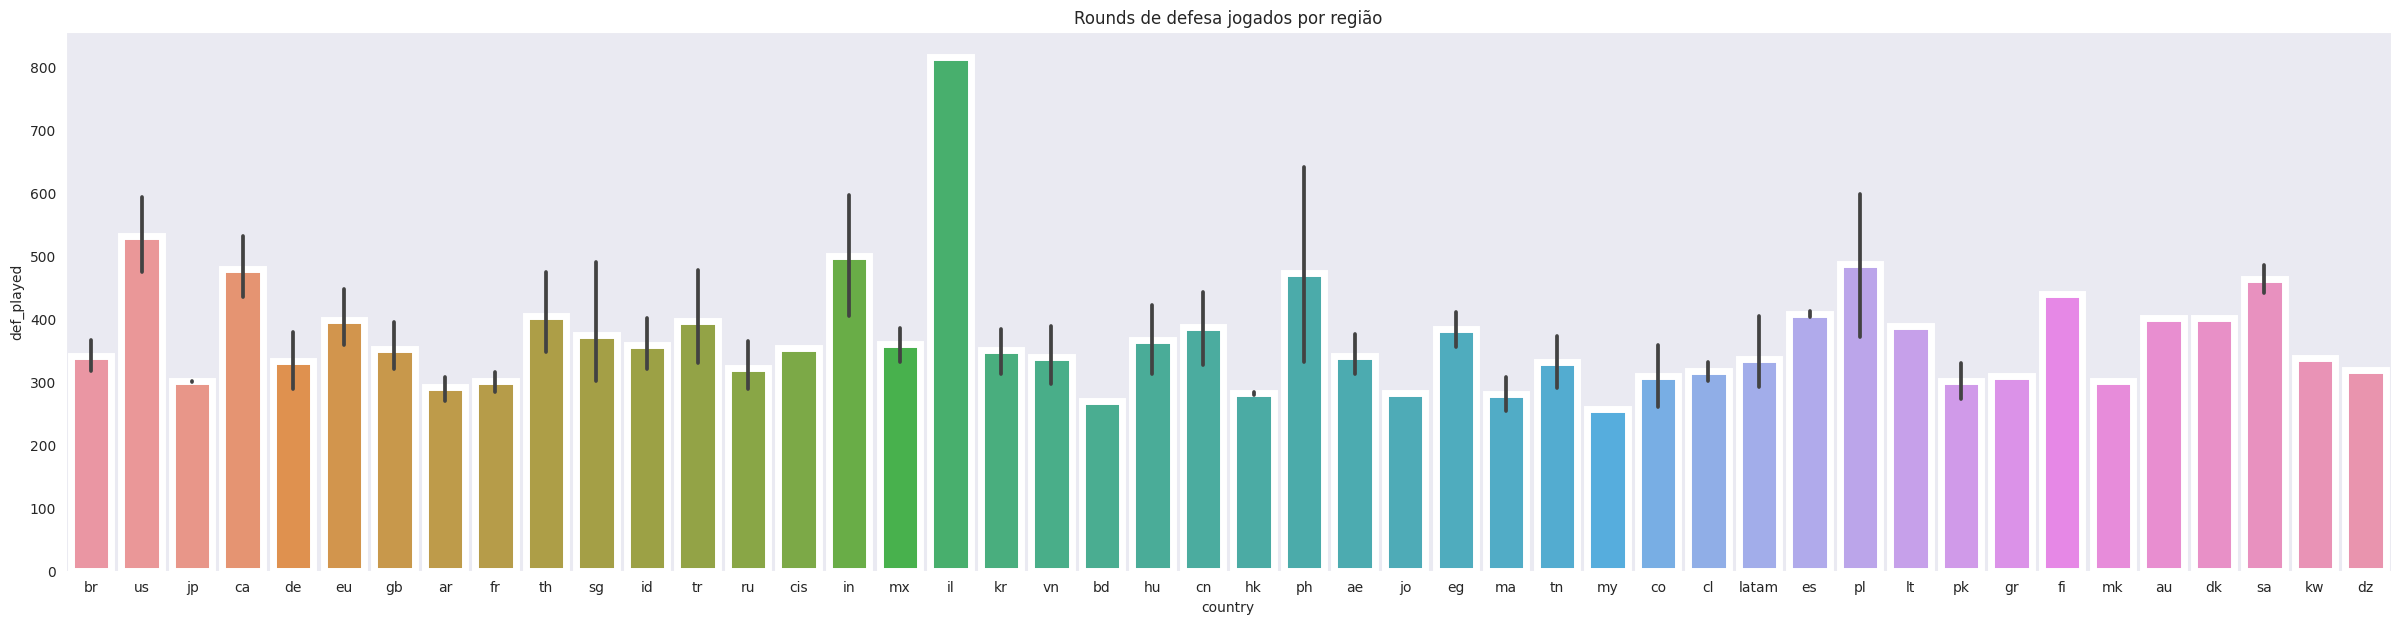

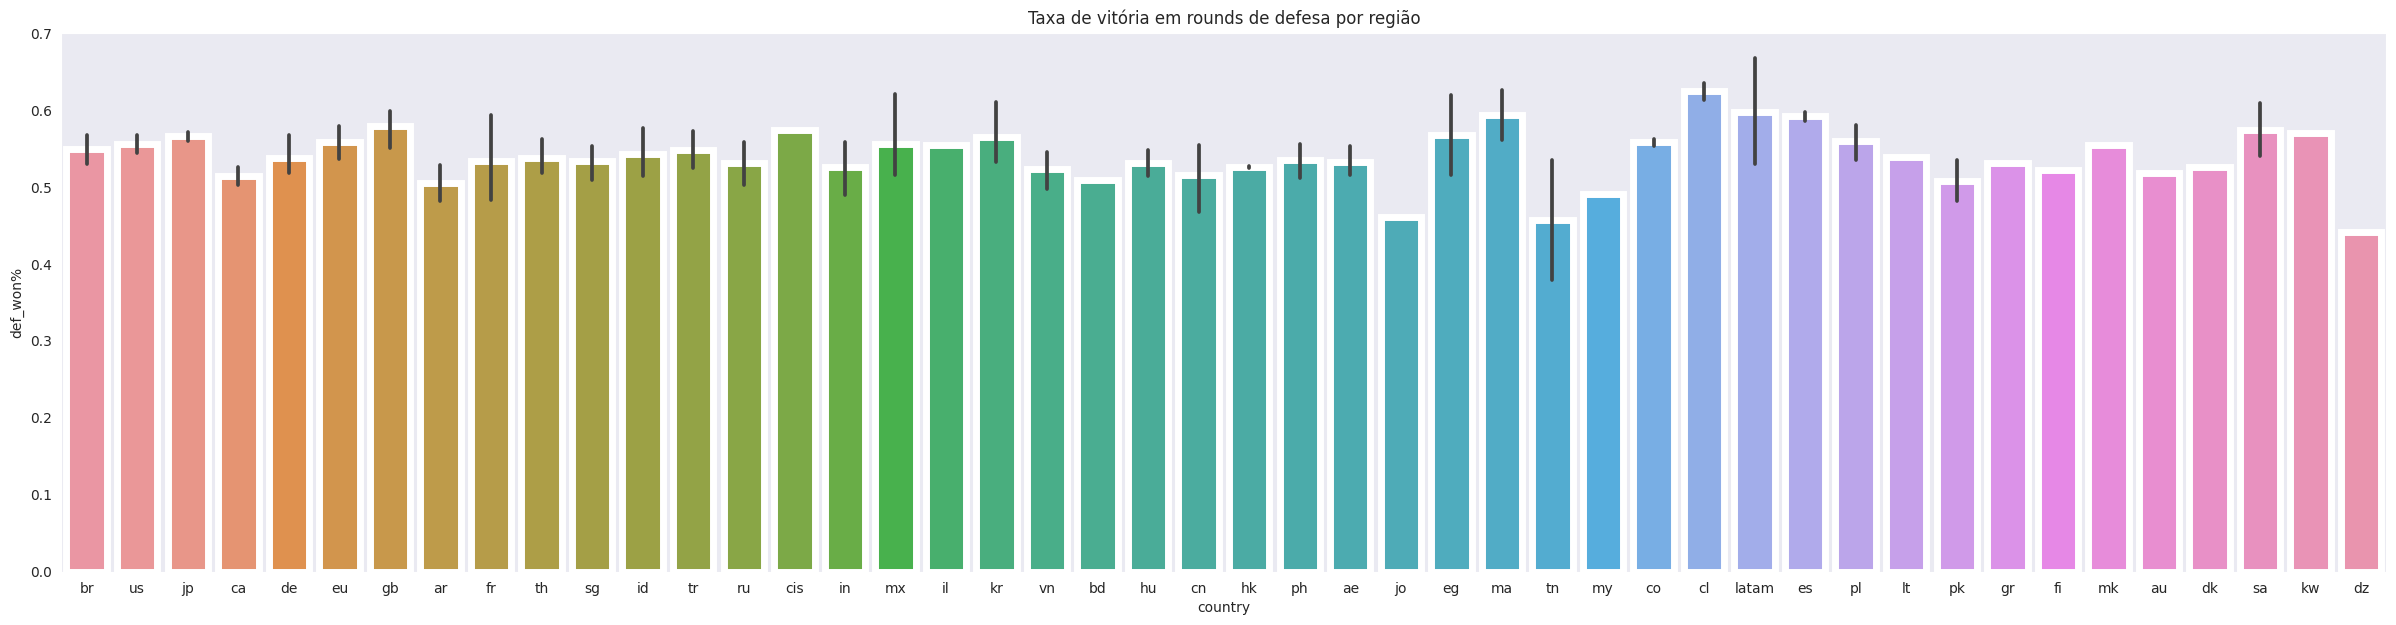

In [18]:
plt.figure(figsize=(30,7))
plt.subplot()
plt.title('Rounds de defesa jogados por região')
sns.barplot(x='country',y='def_played',data=df,linewidth=5)
plt.show()
plt.figure(figsize=(30,7))
plt.subplot()
plt.title('Taxa de vitória em rounds de defesa por região')
sns.barplot(x='country',y='def_won%',data=df,linewidth=5)
plt.show()

No gráfico de cima temos a quantidade de partidas jogadas no modo de defesa, enquanto que no gráfico de baixo temos a taxa de vitórias de cada região na mesma modalidade.

> Mapas:

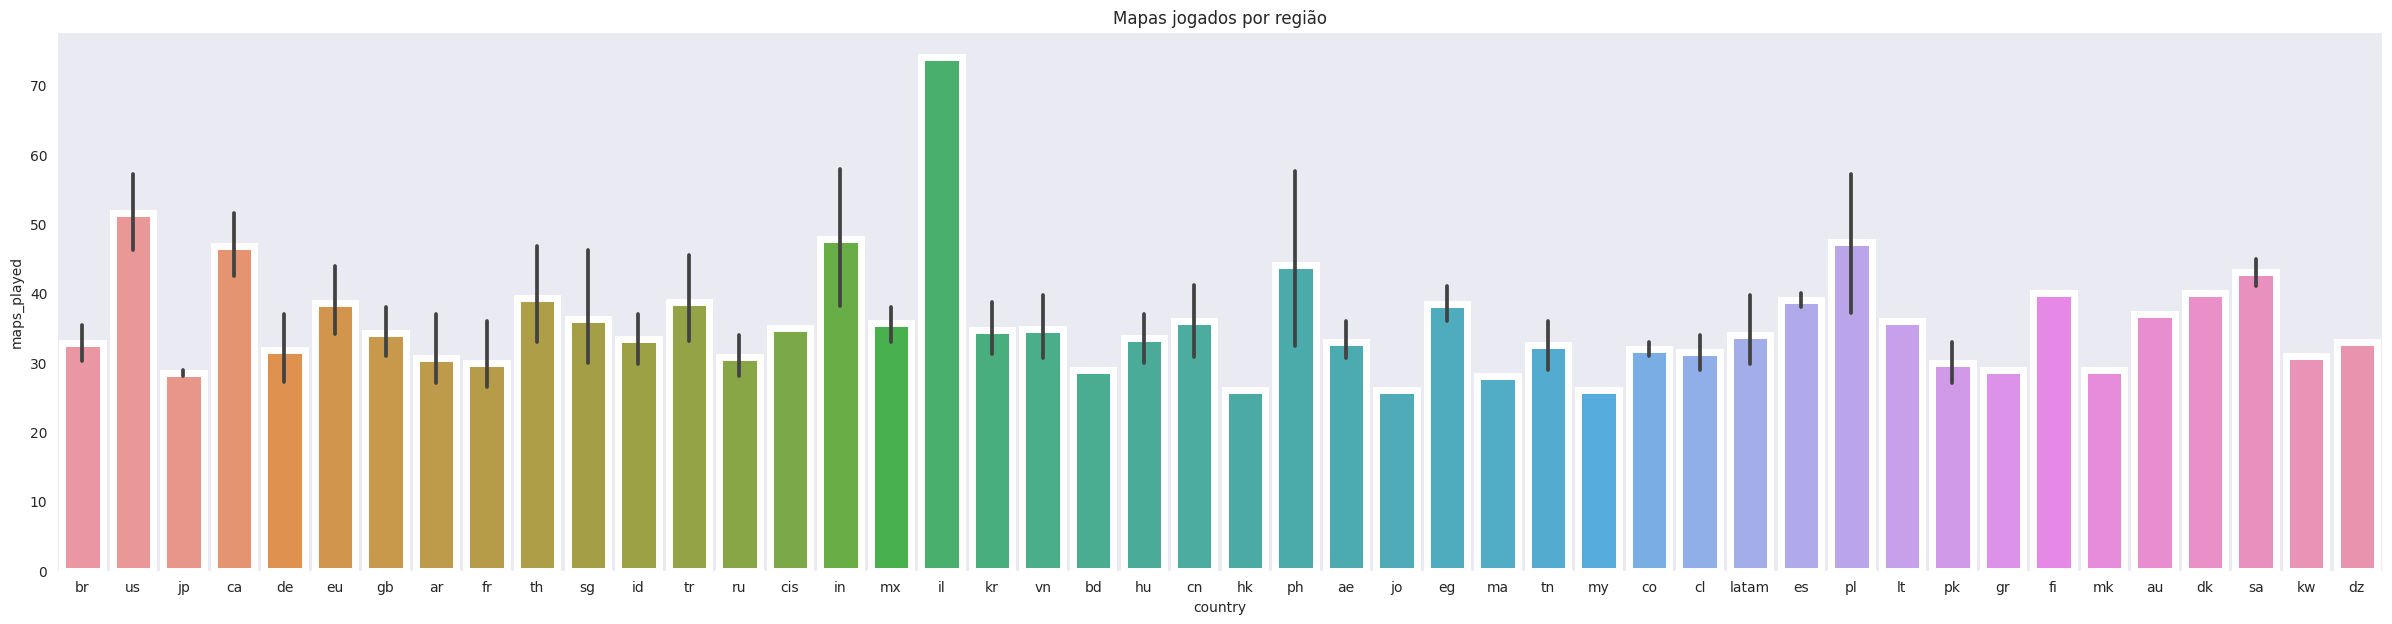

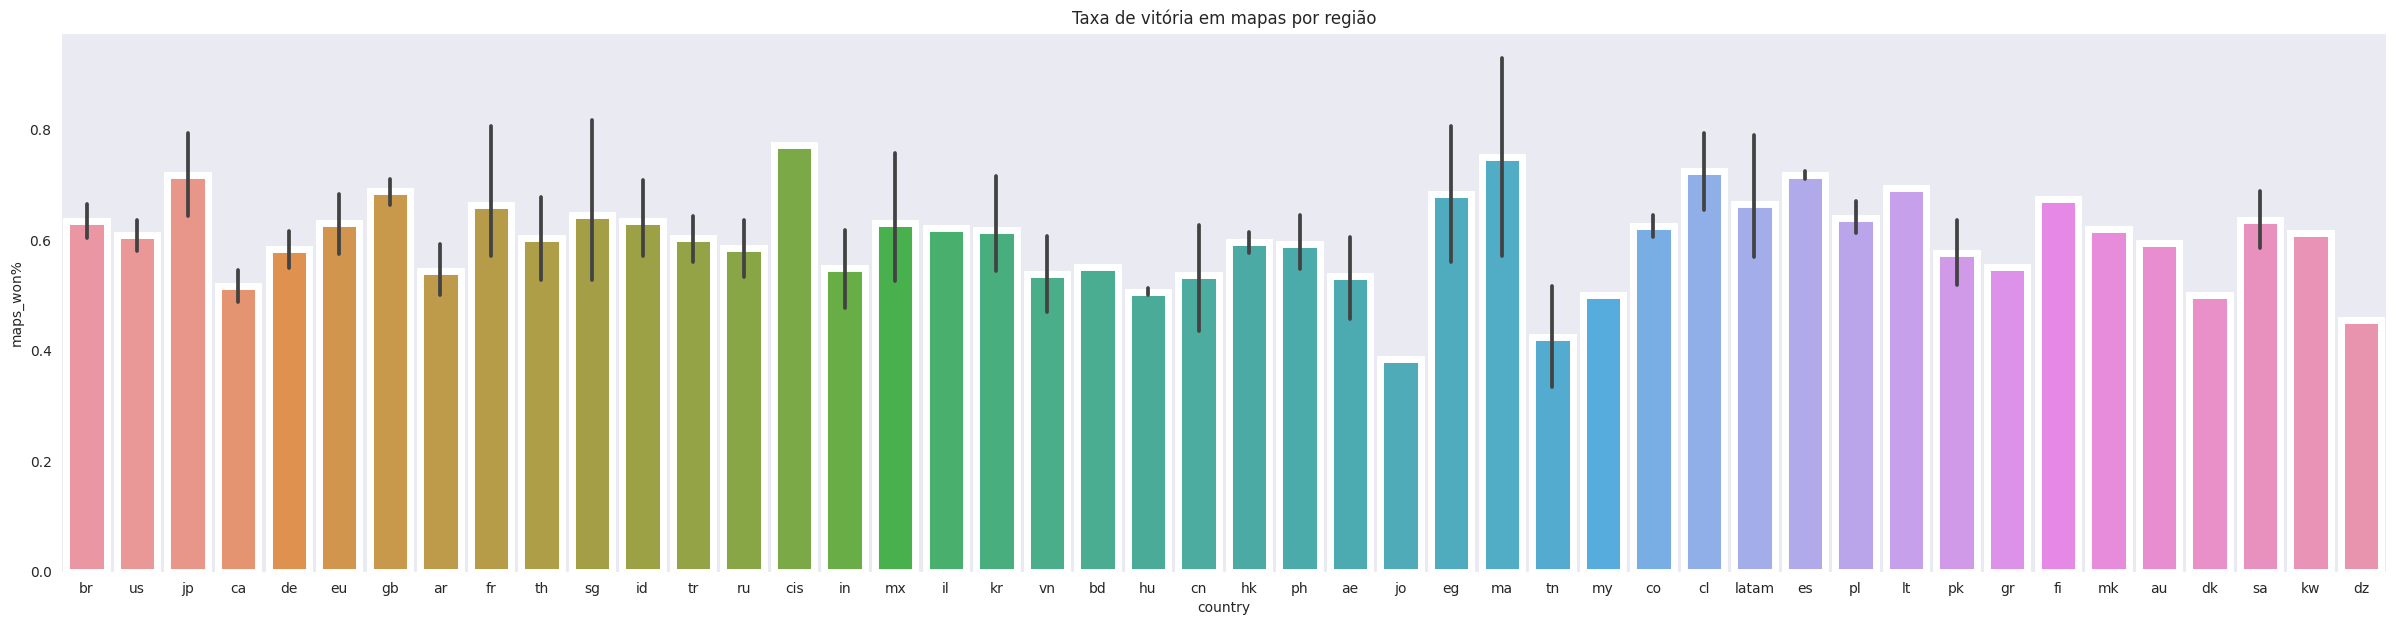

In [19]:
plt.figure(figsize=(30,7))
plt.subplot()
plt.title('Mapas jogados por região')
sns.barplot(x='country',y='maps_played',data=df,linewidth=5)
plt.show()
plt.figure(figsize=(30,7))
plt.subplot()
plt.title('Taxa de vitória em mapas por região')
sns.barplot(x='country',y='maps_won%',data=df,linewidth=5)
plt.show()

O gráfico de cima mostra quantos mapas cada região jogou, enquanto que o gráfico de baixo apresenta a taxa de vitórias de cada região de acordo com a quantidade de mapas jogados e a quantidade de mapas ganhos, como apresentado pela definição de winrate no início dessa análise.

Para finalizar a nossa descrição dos dados, apresentamos aqui uma tabela de correlação entre todas as variáveis, demonstrando sua taxa de dependência.

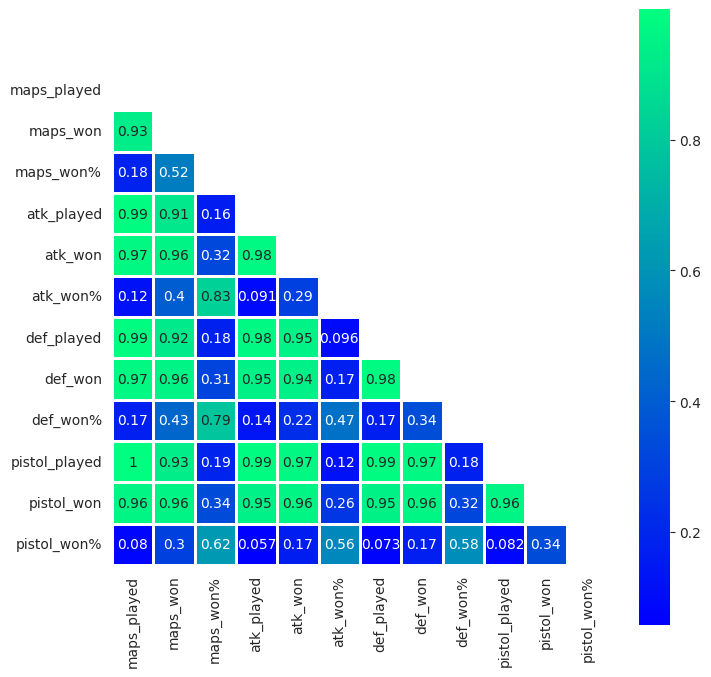

In [20]:
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(8, 8))
    ax = sns.heatmap(corr,mask=mask,square=True,linewidths=.8,cmap="winter",annot=True)

Esse gráfico mostra um índice de correlação entre todas as variáveis da base de dados, ou seja, alguma proporção entre eles. Valores iguais ou próximos de 1 em posição do gráfico indicam que as variáveis na linha/coluna possuem uma relação linear muito próxima.

Como podemos ver, a relação entre rounds de pistola jogados e mapas jogados é 1, uma vez que, como já enunciado, para cada mapa serão jogados obrigatoriamente 2 rounds de pistola, sem variação. Ao passo que as variáveis que representam taxas possuem valores baixos quando comparadas à outras variáveis (objeto de investigação das nossas hipóteses), vemos que, por razões óbvias de dependência, as variáveis que representam quantidades absolutas de mapas ou rounds jogados e vencidos apresentam valores moderados ou altos.

# **3 - Amostragem**

Como a nossa base de dados contém apenas 309 entradas, não necessitamos realizar um processo de amostragem para obter uma amostra que seja mais fácil de trabalhar. No entanto, faremos esse processo ainda assim, para fins de exercício.

Utilizaremos um processo de amostragem probabilistico e estratificado por região. Escolheremos uma amostra com tamanho equivalente a 30% do nosso espaço amostral e realizaremos cálculos a respeito dele.

In [21]:
# Coletando os países disponíveis
unique_countries = df['country'].unique()
# Tamanho da amostra
sample_size = int(len(df) * 0.3)
## criando a amostra estratificada
sts = pd.DataFrame()
# Para cada país único
for country in unique_countries:
    estrato = df[df['country'] == country]            # Colete todos as linhas com aquele país
    sample = df.sample(n=sample_size, replace=False)  # Faça uma amostra simples dessas linhas
    sts = sts.append(sample)        # Inclua na amostra estratificada

A partir dessa amostra, podemos repetir os processos realizados na sessão 2, para encontrar estimativas das média, mediana, desvio padrão e variância de cada uma das taxas de vitória. O bloco de código abaixo realiza essas tarefas e expõe a comparação das estimativas com os valores reais obtidos na sessão 2.

In [22]:
# Comparação
print("\nMédias")
print("			   Base		   Amostra")
print("Rounds de pistola	: {:.3f}%	: {:.3f}%".format(100*np.mean(df['pistol_won%']), 100*np.mean(sts['pistol_won%'])))
print("Rounds de ataque	: {:.3f}%	: {:.3f}%".format(100*np.mean(df['atk_won%']), 100*np.mean(sts['atk_won%'])))
print("Rounds de defesa	: {:.3f}%	: {:.3f}%".format(100*np.mean(df['def_won%']), 100*np.mean(sts['def_won%'])))
print("Mapas			: {:.3f}%	: {:.3f}%".format(100*np.mean(df['maps_won%']), 100*np.mean(sts['maps_won%'])))

print("\nMedianas")
print("			Base		   Amostra")
print("Rounds de pistola	: {:.3f}%	: {:.3f}%".format(100*np.median(df['pistol_won%']), 100*np.median(sts['pistol_won%'])))
print("Rounds de ataque	: {:.3f}%	: {:.3f}%".format(100*np.median(df['atk_won%']), 100*np.median(sts['atk_won%'])))
print("Rounds de defesa	: {:.3f}%	: {:.3f}%".format(100*np.median(df['def_won%']), 100*np.median(sts['def_won%'])))
print("Mapas			: {:.3f}%	: {:.3f}%".format(100*np.median(df['maps_won%']), 100*np.median(sts['maps_won%'])))

print("\nDesvios Padrões")
print("			Base		   Amostra")
print("Rounds de pistola	: {:.3f}%	: {:.3f}%".format(100*np.std(df['pistol_won%']), 100*np.std(sts['pistol_won%'])))
print("Rounds de ataque	: {:.3f}%	: {:.3f}%".format(100*np.std(df['atk_won%']), 100*np.std(sts['atk_won%'])))
print("Rounds de defesa	: {:.3f}%	: {:.3f}%".format(100*np.std(df['def_won%']), 100*np.std(sts['def_won%'])))
print("Mapas			: {:.3f}%	: {:.3f}%".format(100*np.std(df['maps_won%']), 100*np.std(sts['maps_won%'])))

print("\nVariância")
print("			Base		   Amostra")
print("Rounds de pistola	: {:.3f}%	: {:.3f}%".format(100*np.var(df['pistol_won%']), 100*np.var(sts['pistol_won%'])))
print("Rounds de ataque	: {:.3f}%	: {:.3f}%".format(100*np.var(df['atk_won%']), 100*np.var(sts['atk_won%'])))
print("Rounds de defesa	: {:.3f}%	: {:.3f}%".format(100*np.var(df['def_won%']), 100*np.var(sts['def_won%'])))
print("Mapas			: {:.3f}%	: {:.3f}%".format(100*np.var(df['maps_won%']), 100*np.var(sts['maps_won%'])))


Médias
			   Base		   Amostra
Rounds de pistola	: 53.123%	: 53.008%
Rounds de ataque	: 52.663%	: 52.609%
Rounds de defesa	: 53.847%	: 53.800%
Mapas			: 58.477%	: 58.438%

Medianas
			Base		   Amostra
Rounds de pistola	: 53.571%	: 53.429%
Rounds de ataque	: 52.242%	: 52.222%
Rounds de defesa	: 54.046%	: 54.152%
Mapas			: 59.259%	: 59.091%

Desvios Padrões
			Base		   Amostra
Rounds de pistola	: 6.705%	: 6.711%
Rounds de ataque	: 5.267%	: 5.332%
Rounds de defesa	: 5.082%	: 5.111%
Mapas			: 11.904%	: 11.899%

Variância
			Base		   Amostra
Rounds de pistola	: 0.450%	: 0.450%
Rounds de ataque	: 0.277%	: 0.284%
Rounds de defesa	: 0.258%	: 0.261%
Mapas			: 1.417%	: 1.416%


Como pudemos ver, os dados da nossa amostra possuem valures bastante similares com os valores reais da base, com diferença sempre inferior a 5% em todos os casos.

Podemos criar ainda uma tabela de correlação, similar à feita na análise preliminar, para verificar a dependência entre os dados:

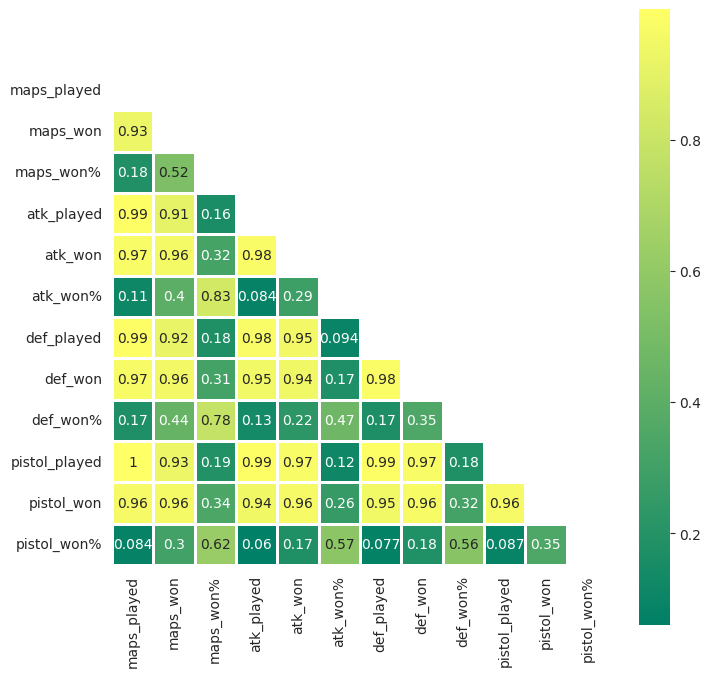

In [23]:
corrS = sts.corr()
mask = np.zeros_like(corrS)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(8, 8))
    ax = sns.heatmap(corrS,mask=mask,square=True,linewidths=.8,cmap="summer",annot=True)

Para via de comparação, podemos destacar que a tabela de correlação desta amostra assemelha-se muito com a tabela de correlação que obtivemos a partir da base de dados completa. Isso indica que, mesmo não sendo perfeita, a amostra não apresenta vieses claros.

# **4 -Teste de Hipóteses**

Com base nos dados da nossa base, verificaremos as hipóteses que fizemos no inicio deste roteiro.

## **Hipótese 1:** Times que jogaram em mais mapas acabarão por ter uma taxa de vitória maior em todos os aspectos.

Observando na tabela de correlação, na primeira coluna (que relaciona com o número de mapas jogados por equipe) vemos que a relação entre a taxa de vitória nos mapas (`maps_won%`), nos rounds de ataque (`atk_won%`), defesa (`def_won%`) e pistola (`pistol_won%`) são valores sempre inferiores a 18%. Dentre elas, o nível de correlação da winrate para rounds de pistola é o menor.

Ainda assim, todos os valores de correlação são superiores a 5%. Portanto, para verificar se a hipótese está correta, utilizaremos um modelo de regressão linear, utilizando o método Least Square Optimization (OSL). Esse método funciona como um algoritmo de otimização, que busca encontrar uma função linear que retorne valores o mais próximo o possível dos dados reais, minimizando os erros ao quadrado.

Este modelo provavelmente não será o bastante para realizar inferências nos nossos dados, contudo, ainda existem informações relevantes que podemos extrair a partir dele.

In [36]:
## Criando uma matriz nova com base nas antigas
modelArray = [df['maps_played'],df['maps_won%'],df['atk_won%'], df['def_won%'], df['pistol_won%']]
modelArray[0] = sm.add_constant(modelArray[0])


> Mapas:

In [37]:
# Mapas:
model = sm.OLS(modelArray[1], modelArray[0])
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              maps_won%   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.031
Method:                 Least Squares   F-statistic:                     10.87
Date:                Thu, 20 Jul 2023   Prob (F-statistic):            0.00109
Time:                        01:02:51   Log-Likelihood:                 224.58
No. Observations:                 309   AIC:                            -445.2
Df Residuals:                     307   BIC:                            -437.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.5293      0.018     29.226      

Como esperado, o valor `R-squared` deste modelo (que indica a viabilidade do modelo) é bastante baixo. Isso acontece por que esse modelo de regressão linear pressupõe que os dados aplicados nele são **Homocedásticos**, ou seja, possuem uma variância constante ao longo de todo o gráfico. Como atestamos anteriormente, todos os dados que envolvem taxas de vitória descrevem um gráfico **Heterocedástico**, com uma variância muito maior no início em comparação ao final do gráfico.

Mesmo assim, podemos notar que o coeficiente do caso constante possui um valor bastante significativo (0.5293). Além disso, o coeficiente para a variação da variável `maps_played`, mesmo sendo baixo, não é nulo, destacando que parece haver uma influência sua na taxa de vitória (`maps_won%`).

Optaremos por utilizar o Modelo de Regressão Linear Robusto, que considera com menor peso os valores com maior variância, diminuindo assim o impacto de outliers.

In [38]:
# Mapas:
model = sm.RLM(modelArray[1], modelArray[0])
results = model.fit()
print(results.summary())

                    Robust linear Model Regression Results                    
Dep. Variable:              maps_won%   No. Observations:                  309
Model:                            RLM   Df Residuals:                      307
Method:                          IRLS   Df Model:                            1
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Thu, 20 Jul 2023                                         
Time:                        01:02:51                                         
No. Iterations:                    15                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.5373      0.016     33.530      

Com base nos dados acima, vemos que mesmo utilizando um modelo de Regressão Linear robusto, o coeficiente do impacto da variável `maps_played` na taxa de vitória em mapas (`maps_won%`) permanece em torno de 0.0013. Isso indica que mesmo que haja alguma influência do número de mapas jogados na taxa de vitória dos times, essa diferença é pequena e, possivelmente, não pode ser explicada por um modelo linear.

Os gráficos de dispersão da taxa de vitória exibidos na sessão 2 descrevem um comportamento compatível com essas afirmações, não havendo um movimento crescente ou decrescente nas observações, apenas um aumento na precisão dos dados.

Como observaremos a seguir, a regressão linear para os outros casos (taxa de vitória em rounds de Ataque, Defesa e Pistola) seguem comportamento análogo a este caso.

> Rounds de Ataque:

In [39]:
# Rounds de Ataque
model = sm.RLM(modelArray[2], modelArray[0])
results = model.fit()
print(results.summary())

                    Robust linear Model Regression Results                    
Dep. Variable:               atk_won%   No. Observations:                  309
Model:                            RLM   Df Residuals:                      307
Method:                          IRLS   Df Model:                            1
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Thu, 20 Jul 2023                                         
Time:                        01:02:51                                         
No. Iterations:                    20                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.5096      0.008     66.733      

> Rounds de Defesa:

In [40]:
# Rounds de Defesa
model = sm.RLM(modelArray[3], modelArray[0])
results = model.fit()
print(results.summary())

                    Robust linear Model Regression Results                    
Dep. Variable:               def_won%   No. Observations:                  309
Model:                            RLM   Df Residuals:                      307
Method:                          IRLS   Df Model:                            1
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Thu, 20 Jul 2023                                         
Time:                        01:02:51                                         
No. Iterations:                    17                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.5188      0.007     69.292      

> Rounds de Pistola:

In [41]:
# Rounds de Pistola
model = sm.RLM(modelArray[4], modelArray[0])
results = model.fit()
print(results.summary())

                    Robust linear Model Regression Results                    
Dep. Variable:            pistol_won%   No. Observations:                  309
Model:                            RLM   Df Residuals:                      307
Method:                          IRLS   Df Model:                            1
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Thu, 20 Jul 2023                                         
Time:                        01:02:52                                         
No. Iterations:                    15                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.5193      0.010     51.380      

Algo relevante a ser destacado é que o erro na hipótese nula é, em todos os
modelos, maior do que o coeficiente da variável `maps_played`. Assim sendo, mesmo que o modelo de regressão linear não seja o suficiente para realizar inferências quanto às taxas de vitória de certo time baseado no número de mapas que o time jogou, vemos que ele é suficiente para afirmarmos que o impacto nas taxas de vitória é pequeno o suficiente para ser desconsiderado.

## **Hipótese 2:** Times que tem alta taxa de vitória enquanto estão na função de atacantes possuirão taxa de vitória significativamente menor quando estiverem defendendo e vice-versa.

Para observar a situação de forma mais clara, podemos criar um gráfico com as variáveis em questão:


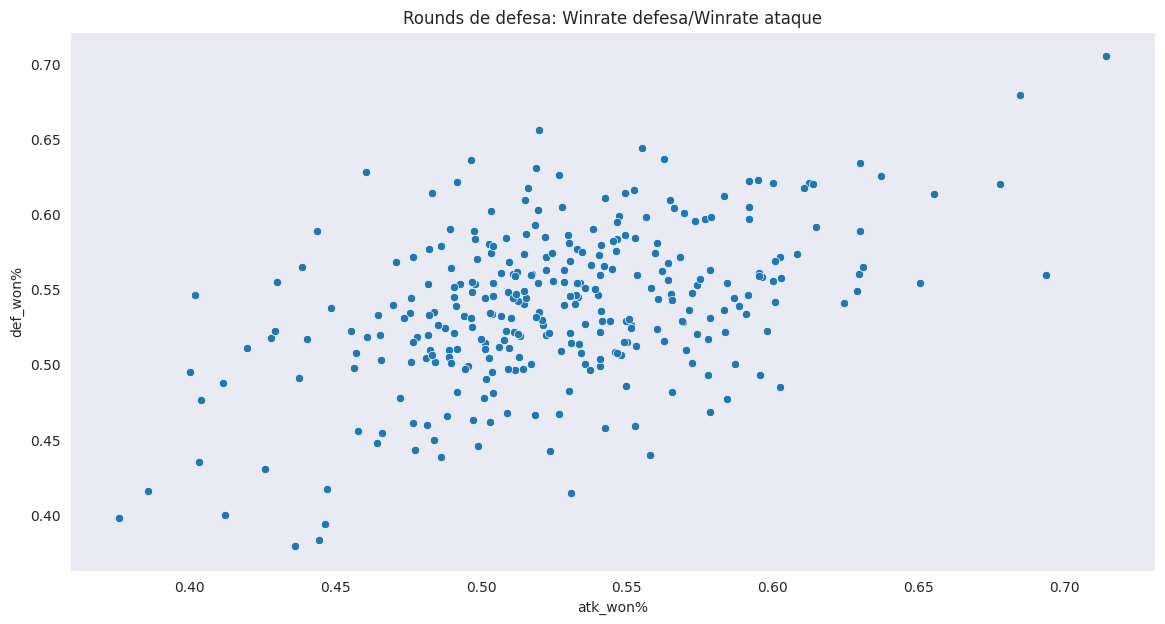

In [42]:
plt.figure(figsize=(14,7))
plt.subplot(1, 1, 1)
plt.title('Rounds de defesa: Winrate defesa/Winrate ataque')
sns.scatterplot(data=df, x='atk_won%', y='def_won%',)
plt.show()

Podemos observar que, mesmo com grande imprecisão dos dados, é visível certa relação de linearidade entre essas variáveis. Para verificar isso, assim como na Hipótese anterior, realizaremos o modelo de Regressão Linear Robusta para a verificação dos coeficientes.

Serão criados dois modelos: o primeiro tomará como variável resposta a winrate em rounds de defesa, explicada pela winrate em rounds de ataque; e o segundo fará oposto, tentará explicar a winrate no ataque através da winrate na defesa.

In [43]:
## Criando uma matriz nova com base nas antigas PARA CADA CASO
model_atk_def = [df['atk_won%'],df['def_won%']]
model_def_atk = [df['def_won%'],df['atk_won%']]

## Adicionando um valor constante em cada caso
model_atk_def[0] = sm.add_constant(model_atk_def[0])
model_def_atk[0] = sm.add_constant(model_def_atk[0])

Após adicionados os valores constantes em diferentes matrizes, veremos os dados do modelos que os tomam como base.

In [44]:
## Modelo 1: Winrate Ataque explicando Winrate Defesa
model = sm.RLM(model_atk_def[1], model_atk_def[0])
results = model.fit()
print(results.summary())

                    Robust linear Model Regression Results                    
Dep. Variable:               def_won%   No. Observations:                  309
Model:                            RLM   Df Residuals:                      307
Method:                          IRLS   Df Model:                            1
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Thu, 20 Jul 2023                                         
Time:                        01:02:52                                         
No. Iterations:                    25                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3047      0.026     11.733      0.0

Note que, para esse caso, podemos observar um impacto bastante pronunciado no coeficiente da variável `atk_won%` (0.4454). Isso, aliado ao fato de que este coeficiente é **positivo**, indica o oposto do que tínhamos como hipótese, ou seja, a winrate em rounds de defesa tende a ser maior para times que também tem uma taxa de vitória alta no ataque.

Para confirmar que esse comportamento é recíproco, observemos o modelo 2.

In [45]:
## Modelo 2: Winrate Defesa explicando Winrate Ataque
model = sm.RLM(model_def_atk[1], model_def_atk[0])
results = model.fit()
print(results.summary())

                    Robust linear Model Regression Results                    
Dep. Variable:               atk_won%   No. Observations:                  309
Model:                            RLM   Df Residuals:                      307
Method:                          IRLS   Df Model:                            1
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Thu, 20 Jul 2023                                         
Time:                        01:02:52                                         
No. Iterations:                    22                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2740      0.029      9.471      0.0

Como visto, esse modelo aponta que a taxa de vitória em rounds de ataque tende a ser maior para times com alta taxa de vitória na defesa, o que inferimos a partir do coeficiente positivo 0.4682 para a variável `def_won%` na variável dependente `atk_won%`.

Com isso, atestamos que a Hipótese 2 é falsa. Times que são mais vitoriosos no ataque também devem ser bem sucedidos na defesa e vice-versa.

## **Hipótese 3:** Taxas de vitórias altas em rounds de pistola aumentam a chance de vencer o mapa.

Da mesma maneira que nas hipóteses anteriores, também verificaremos esta hipótese utilizando regressão linear. Para melhor visualização, observemos o gráfico dos dados relevantes para essa hipótese:

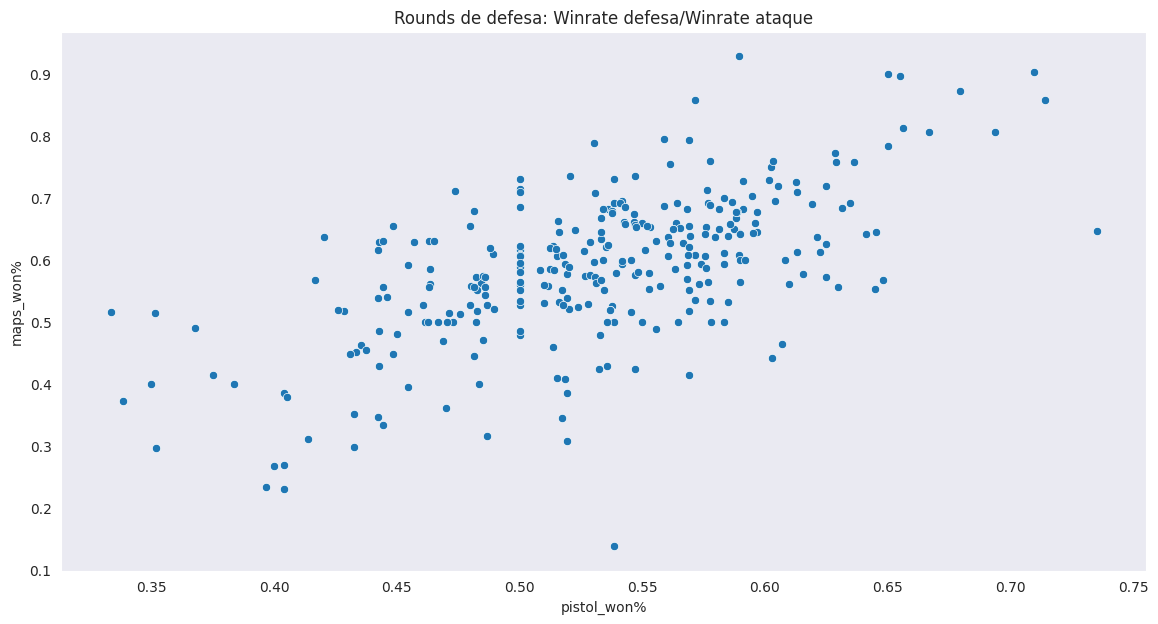

In [46]:
plt.figure(figsize=(14,7))
plt.subplot(1, 1, 1)
plt.title('Rounds de defesa: Winrate defesa/Winrate ataque')
sns.scatterplot(data=df, x='pistol_won%', y='maps_won%',)
plt.show()

Assim como na hipótese 2, vemos que os dados para esta hipótese se distribuem de maneira ligeiramente linear, mesmo que com pouca precisão. Para confirmar ou rejeitar esta hipótese, mais uma vez recorreremos ao modelo de Regressão Linear Robusta, porém, dessa vez será necessário apenas um modelo, como veremos abaixo.

In [47]:
## Criando o modelo e adicionando um caso constante:
model_map_pistol = [df['pistol_won%'], df['maps_won%']]
model_map_pistol[0] = sm.add_constant(model_map_pistol[0])

## Testando o modelo
model = sm.RLM(model_map_pistol[1], model_map_pistol[0])
results = model.fit()
print(results.summary())

                    Robust linear Model Regression Results                    
Dep. Variable:              maps_won%   No. Observations:                  309
Model:                            RLM   Df Residuals:                      307
Method:                          IRLS   Df Model:                            1
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Thu, 20 Jul 2023                                         
Time:                        01:02:52                                         
No. Iterations:                    21                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0151      0.040      0.374      

Com base nesse modelo, confirmamos a hipótese de que times com maior taxa de vitória em rounds de pistola também possuem maior tendência a ganhar o mapa. Isso pode ser verificado pelo coeficiente da variável `pistol_won%` ser positivo (1.0793). Além disso, verificamos também que a hipótese constante tem um valor bastante pequeno (0.0151).

Com isso, a Hipótese 3 é verdadeira. Assim sendo, encerramos a análise das hipóteses.